In [1]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
city_df = pd.read_csv(city_data_to_load)
ride_df = pd.read_csv(ride_data_to_load)

# Combine the data into a single dataset
pyber_df = pd.merge(ride_df, city_df, on="city", how="left")

# Display the data table for preview
pyber_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344,46,Urban


## Bubble Plot of Ride Sharing Data

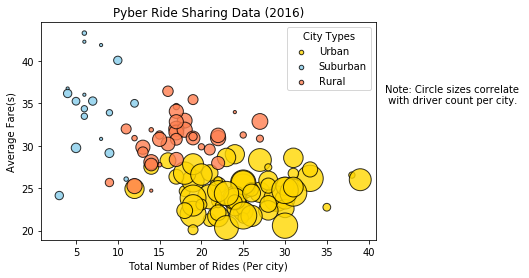

In [2]:
# Obtain the x and y coordinates for each of the three city types
urban_cities = pyber_df[pyber_df["type"] == "Urban"].groupby([pyber_df["city"]])
suburban_cities = pyber_df[pyber_df["type"] == "Rural"].groupby([pyber_df["city"]])
rural_cities = pyber_df[pyber_df["type"] == "Suburban"].groupby([pyber_df["city"]])

urban_ride = urban_cities["ride_id"].count()
urban_fare = urban_cities["fare"].mean()
urban_driver = urban_cities["driver_count"].mean()

suburban_ride = suburban_cities["ride_id"].count()
suburban_fare = suburban_cities["fare"].mean()
suburban_driver = suburban_cities["driver_count"].mean()

rural_ride = rural_cities["ride_id"].count()
rural_fare = rural_cities["fare"].mean()
rural_driver = rural_cities["driver_count"].mean()

# Build the scatter plots for each city types
plt.scatter(urban_ride, urban_fare, s=urban_driver*10, 
            color="Gold", edgecolor="black", 
            alpha=0.80, marker="o",label = "Urban")

plt.scatter(suburban_ride, suburban_fare, s=suburban_driver*10,
            color="SkyBlue", edgecolor="black", 
            alpha=0.80, marker="o", label = "Suburban")

plt.scatter(rural_ride, rural_fare, s=rural_driver*10, 
            color="Coral", edgecolor="black", 
            alpha=0.80, marker="o", label = "Rural")

# Incorporate the other graph properties
plt.title("Pyber Ride Sharing Data (2016)")
plt.xlabel("Total Number of Rides (Per city)")
plt.ylabel("Average Fare(s)")
labels = ["Urban", "Suburban", "Rural"]

# Create a legend
legend=plt.legend(title="City Types")
legend.legendHandles[0]._sizes=[20]
legend.legendHandles[1]._sizes=[20]
legend.legendHandles[2]._sizes=[20]

# Incorporate a text label regarding circle size
plt.text(42, 35,"Note: Circle sizes correlate \n with driver count per city.")

# Save Figure
plt.savefig("./PyberData.png")

In [3]:
# Show plot
plt.show()

## Total Fares by City Type

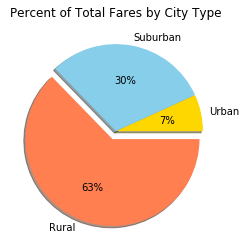

In [13]:
# Calculate Type Percents
fare_group = pyber_df.groupby("type")
total_fares = fare_group["fare"].sum()

# Build Pie Chart
labels = ["Urban", "Suburban", "Rural"]
colors = ["Gold", "SkyBlue", "Coral"]
explode = (0, 0, 0.1)

plt.pie(total_fares, explode=explode, 
        labels=labels, colors=colors, 
        autopct="%1.1f%%", shadow=True, startangle=0)

plt.title("Percent of Total Fares by City Type")

# Save Figure
plt.savefig("./TotalFares.png")

In [5]:
# Show Figure
plt.show()

## Total Rides by City Type

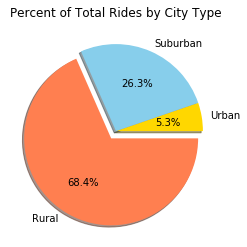

In [6]:
# Calculate Ride Percents
ride_group = pyber_df.groupby("type")
total_rides = ride_group["ride_id"].count()

# Build Pie Chart
plt.pie(total_rides, explode=explode, 
        labels=labels, colors=colors, 
        autopct="%1.1f%%", shadow=True, startangle=0)

plt.title("Percent of Total Rides by City Type")

# Save Figure
plt.savefig("./TotalRides.png")

In [7]:
# Show Figure
plt.show()

## Total Drivers by City Type

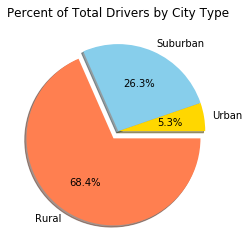

In [14]:
# Calculate Driver Percents
driver_group = pyber_df.groupby("type")
total_drivers = driver_group["driver_count"].count()

# Build Pie Charts
plt.pie(total_drivers, explode=explode, 
        labels=labels, colors=colors, 
        autopct="%1.1f%%", shadow=True, startangle=0)

plt.title("Percent of Total Drivers by City Type")

# Save Figure
plt.savefig("./TotalDrivers.png")

In [9]:
# Show Figure
plt.show()